# Simple Linear Regression

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Explore the dataset

In [2]:
data = pd.read_csv("SAT_GPA.csv")

In [3]:
# To read the top 5 entries of the database
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
# First, we will check effect of TV ads on sales (Simple Linear Regression)

x = data.iloc[:,:1].values
y = data.iloc[:,-1].values

In [7]:
x

array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [8]:
y

array([2.4 , 2.52, 2.54, 2.74, 2.83, 2.91, 3.  , 3.  , 3.01, 3.01, 3.02,
       3.07, 3.08, 3.08, 3.12, 3.17, 3.17, 3.17, 3.17, 3.19, 3.19, 3.19,
       3.2 , 3.21, 3.24, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.28, 3.29,
       3.29, 3.29, 3.31, 3.32, 3.34, 3.37, 3.37, 3.37, 3.38, 3.38, 3.39,
       3.39, 3.4 , 3.4 , 3.4 , 3.41, 3.41, 3.41, 3.42, 3.42, 3.42, 3.44,
       3.47, 3.47, 3.47, 3.47, 3.48, 3.49, 3.49, 3.5 , 3.51, 3.51, 3.52,
       3.52, 3.54, 3.58, 3.58, 3.59, 3.59, 3.6 , 3.6 , 3.61, 3.62, 3.64,
       3.65, 3.71, 3.71, 3.71, 3.73, 3.76, 3.81])

Text(0.5, 1.0, 'SAT vs GPA')

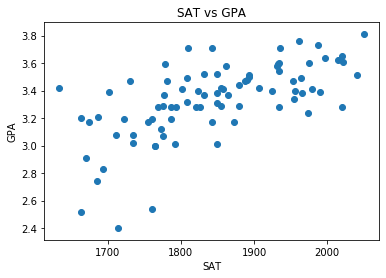

In [9]:
plt.scatter(x,y)
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.title("SAT vs GPA")

## Split the Dataset into training set and test set

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101 )

In [11]:
x.shape

(84, 1)

In [12]:
x_train.shape

(67, 1)

## Option1 - Train the simple linear regression model on training set using scikit

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [14]:
coefficient = lr.coef_.round(4)
coefficient

array([0.0016])

In [15]:
intercept = lr.intercept_.round(4)
intercept

0.2971

In [16]:
print("The equation of our simple regression model is GPA = {}xSAT + {}".format(coefficient, intercept))

The equation of our simple regression model is GPA = [0.0016]xSAT + 0.2971


In [17]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([3.23051304, 3.34541905, 3.34213602, 3.17798458, 3.02696524,
       3.61462743, 3.1238146 , 3.45704204, 3.2945321 , 3.13694671,
       3.20096578, 3.29124907, 3.18619215, 3.10739945, 3.35198511,
       3.19275821, 3.51777807])

## Compare the (predicted) test set results with (given) y_test

In [18]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([3.21081487, 3.20753184, 3.38153237, 3.47181567, 3.18783366,
       3.42749478, 3.28632453, 3.39466449, 3.06307856, 3.52434413,
       3.25513576, 3.4750987 , 3.53747625, 3.30438119, 3.02860676,
       3.50464596, 3.66223135, 3.0450219 , 3.53911776, 2.97936132,
       3.37004177, 3.40451357, 3.32079634, 3.34213602, 3.21409789,
       3.30273968, 3.22066395, 3.19275821, 3.61298591, 3.33228694,
       3.21573941, 3.26498484, 3.26498484, 3.50792899, 3.32243785,
       3.33392845, 3.11068248, 3.06636159, 3.09098431, 3.47181567,
       3.46689112, 3.14515429, 3.22887152, 3.50300444, 3.33392845,
       3.56374048, 3.38317389, 3.40123054, 3.24200364, 3.23872061,
       3.54568382, 3.47181567, 3.14515429, 3.03845584, 3.40451357,
       3.5210611 , 3.57523108, 3.26826787, 3.07621068, 3.35855117,
       3.61298591, 3.33392845, 3.60477834, 3.64745772, 3.47017415,
       3.55881594, 3.21081487])

In [19]:
y_test_pred_rounded = [round (elem,2) for elem in y_test_pred.tolist()]
y_test_pred_rounded

[3.23,
 3.35,
 3.34,
 3.18,
 3.03,
 3.61,
 3.12,
 3.46,
 3.29,
 3.14,
 3.2,
 3.29,
 3.19,
 3.11,
 3.35,
 3.19,
 3.52]

In [20]:
x_test_rounded = [round (elem,2) for elem in x_test.flatten().tolist()]
x_test_rounded

[1787,
 1857,
 1855,
 1755,
 1663,
 2021,
 1722,
 1925,
 1826,
 1730,
 1769,
 1824,
 1760,
 1712,
 1861,
 1764,
 1962]

In [21]:
data = {"x_test":x_test_rounded, "y_test":y_test,"y_test_predict":y_test_pred_rounded}
summary=pd.DataFrame(data)
summary

,x_test,y_test,y_test_predict
0,1787,3.28,3.23
1,1857,3.41,3.35
2,1855,3.29,3.34
3,1755,3.17,3.18
4,1663,3.20,3.03
5,2021,3.61,3.61
6,1722,3.19,3.12
7,1925,3.40,3.46
8,1826,3.28,3.29
9,1730,3.47,3.14


## Visualising the training set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

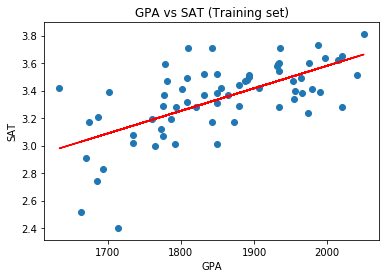

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color="red")
plt.title('GPA vs SAT (Training set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.tight_layout

## Visualise the test set results

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

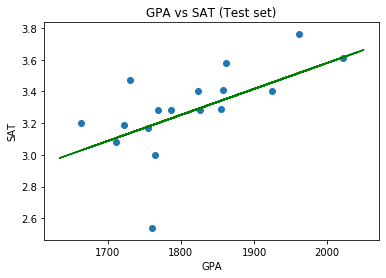

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('GPA vs SAT (Test set)')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.tight_layout

## Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

0.21

In [26]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.41

## Option2 - Train the simple linear regression model on training set using statsmodel

In [27]:
import statsmodels.api as sm

In [28]:
original_data = pd.read_csv("SAT_GPA.csv")
original_data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [29]:
X = original_data["SAT"]
Y = original_data["GPA"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 101)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     44.69
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           6.22e-09
Time:                        17:56:38   Log-Likelihood:                 10.161
No. Observations:                  67   AIC:                            -16.32
Df Residuals:                      65   BIC:                            -11.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2971      0.456      0.652      0.5

In [30]:
data = pd.read_csv("SAT_GPA.csv")

# To read the top 5 entries of the database
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [31]:
import random
randomlist = []
for i in range(1,85):
    n = random.randint(1,3)
    randomlist.append(n)
print(randomlist)

[1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 3, 2, 3]


In [32]:
data["random_list"] = randomlist

In [33]:
data

,SAT,GPA,random_list
0,1714,2.40,1
1,1664,2.52,1
2,1760,2.54,2
3,1685,2.74,2
4,1693,2.83,1
...,...,...,...
79,1936,3.71,2
80,1810,3.71,2
81,1987,3.73,3
82,1962,3.76,2


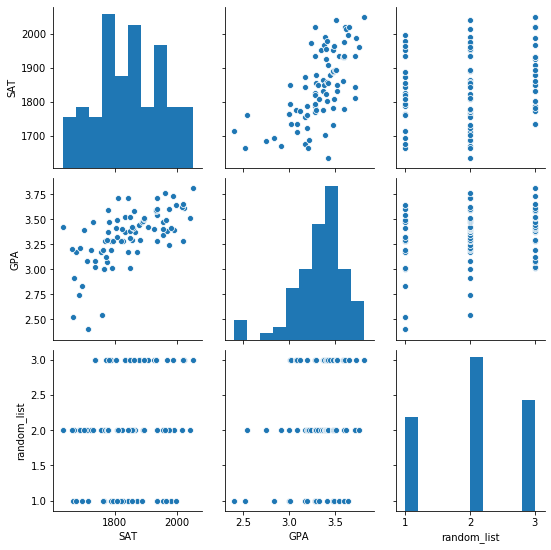

In [34]:
sns.pairplot(data=data)

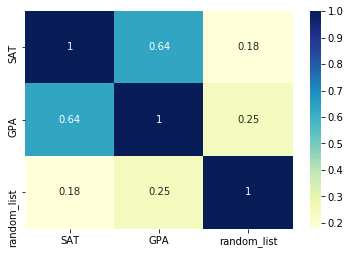

In [35]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [36]:
x = data.iloc[:, [0,2]].values 
y = data.iloc[:,1:2].values

In [37]:
x

array([[1714,    1],
       [1664,    1],
       [1760,    2],
       [1685,    2],
       [1693,    1],
       [1670,    2],
       [1764,    2],
       [1764,    1],
       [1792,    1],
       [1850,    3],
       [1735,    3],
       [1775,    3],
       [1735,    3],
       [1712,    2],
       [1773,    3],
       [1872,    1],
       [1755,    2],
       [1674,    1],
       [1842,    1],
       [1786,    3],
       [1761,    1],
       [1722,    2],
       [1663,    2],
       [1687,    2],
       [1974,    2],
       [1826,    1],
       [1787,    1],
       [1821,    1],
       [2020,    3],
       [1794,    1],
       [1769,    2],
       [1934,    2],
       [1775,    2],
       [1855,    1],
       [1880,    3],
       [1849,    2],
       [1808,    1],
       [1954,    2],
       [1777,    2],
       [1831,    3],
       [1865,    2],
       [1850,    3],
       [1966,    3],
       [1702,    2],
       [1990,    2],
       [1925,    3],
       [1824,    2],
       [1956,

In [38]:
y

array([[2.4 ],
       [2.52],
       [2.54],
       [2.74],
       [2.83],
       [2.91],
       [3.  ],
       [3.  ],
       [3.01],
       [3.01],
       [3.02],
       [3.07],
       [3.08],
       [3.08],
       [3.12],
       [3.17],
       [3.17],
       [3.17],
       [3.17],
       [3.19],
       [3.19],
       [3.19],
       [3.2 ],
       [3.21],
       [3.24],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.28],
       [3.29],
       [3.29],
       [3.29],
       [3.31],
       [3.32],
       [3.34],
       [3.37],
       [3.37],
       [3.37],
       [3.38],
       [3.38],
       [3.39],
       [3.39],
       [3.4 ],
       [3.4 ],
       [3.4 ],
       [3.41],
       [3.41],
       [3.41],
       [3.42],
       [3.42],
       [3.42],
       [3.44],
       [3.47],
       [3.47],
       [3.47],
       [3.47],
       [3.48],
       [3.49],
       [3.49],
       [3.5 ],
       [3.51],
       [3.51],
       [3.52],
       [3.

## Split the Dataset into training set and test set

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [40]:
x.shape

(84, 2)

In [41]:
x_train.shape

(67, 2)

## Option - Train the multiple linear regression model on training set using scikit

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

In [43]:
intercept = lr.intercept_.round(5)
intercept

array([0.20284])

In [44]:
coefficient = lr.coef_.round(5)
coefficient

array([[0.00163, 0.0592 ]])

In [45]:
coefficient_summary = pd.DataFrame(coefficient.reshape(1,2),columns=["SAT", "random_list"], index=["Coefficients"])
coefficient_summary
coefficient_summary["Intercept"] = intercept
coefficient_summary

,SAT,random_list,Intercept
Coefficients,0.00163,0.0592,0.20284


In [46]:
y_test_pred = lr.predict(x_test)
y_test_pred

array([[3.18832465],
       [3.34345686],
       [3.3189623 ],
       [3.59086626],
       [3.2356808 ],
       [3.21365004],
       [3.4716594 ],
       [3.51206825],
       [3.54636064],
       [3.40144166],
       [3.41245704],
       [3.19159059],
       [3.11688936],
       [3.07606509],
       [3.21976651],
       [3.37204819],
       [3.51533419]])

In [47]:
y_train_pred = lr.predict(x_train)
y_train_pred

array([[3.20996869],
       [3.48267478],
       [3.14260148],
       [3.68067964],
       [3.45123293],
       [3.4091911 ],
       [3.36673387],
       [3.52391446],
       [3.37041522],
       [3.61167946],
       [2.97930441],
       [3.47940884],
       [3.67904667],
       [3.21365004],
       [3.49452099],
       [3.13321907],
       [3.53371228],
       [3.42020648],
       [3.10055965],
       [3.13770256],
       [3.4691956 ],
       [3.40144166],
       [3.0368738 ],
       [3.24384566],
       [3.2912018 ],
       [3.1801598 ],
       [3.54472767],
       [3.27365454],
       [3.1871071 ],
       [3.45043078],
       [3.21445218],
       [3.02666056],
       [3.22466542],
       [3.19527195],
       [3.14628283],
       [3.29978207],
       [3.27896887],
       [3.42020648],
       [3.06095294],
       [3.20180383],
       [3.28876669],
       [3.35040416],
       [3.32305907],
       [3.62515864],
       [3.49369016],
       [3.40144166],
       [3.52513202],
       [3.523

## Model Evaluation

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred)).round(2)
rmse

0.22

In [50]:
#R-squared
r2=lr.score(x_train,y_train)
r2.round(2)

0.44

In [51]:
# Adjusted R-squared

# adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

# n = number of observations

# p = number of predictors

x_train.shape
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2.round(2)

0.42

## Option - Train the multiple linear regression model on training set using statsmodels

In [52]:
import statsmodels.api as sm

In [53]:
original_data = pd.read_csv("SAT_GPA.csv")
data.head()

,SAT,GPA,random_list
0,1714,2.40,1
1,1664,2.52,1
2,1760,2.54,2
3,1685,2.74,2
4,1693,2.83,1


In [54]:
data.columns

Index(['SAT', 'GPA', 'random_list'], dtype='object')

In [55]:
X = data[['SAT', 'random_list']]
Y = data["GPA"]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train,X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     27.06
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           3.04e-09
Time:                        17:56:41   Log-Likelihood:                 15.825
No. Observations:                  67   AIC:                            -25.65
Df Residuals:                      64   BIC:                            -19.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2057      0.432      0.476      